In [1]:
import matplotlib.pyplot as plt
from brain import *

In [2]:
k = 1e2
n = 1e4
p = 0.1
b = 0.1
T = 10

In [6]:

def test_memorization_convergence(num_engrams):
    mem = Memory(k, n, p, b, T)
    concept, all_assemblies = mem.add_concept('Christos', num_engrams)
    t_mem = 200
    stimulus = Stimulus(k, n, p, attribute='Christos')
    fiber = Fiber(n, p, b) # concept <-> area
    concept_winners, covergence_timestep = \
        mem.stimulate_WM(stimulus, fiber, t_mem, until_converge=True)
    intersection = np.array([len(np.intersect1d(concept_winners, asseb)) \
         for asseb in all_assemblies])
    mean_intersection = np.mean(intersection)
    print(mean_intersection, covergence_timestep)
    return mean_intersection, covergence_timestep

In [7]:
xs, ys = [], []
for _ in range(100):
    x, y = test_memorization_convergence(50)
    xs.append(x)
    ys.append(y)
xs, ys = np.array(xs), np.array(ys)

0.76 123
1.02 77
1.1 90
1.04 124
1.18 96
1.1 129
0.9 111
1.24 95
1.06 139
1.0 96
1.04 91
1.1 141
0.92 138
1.08 122
0.82 131
0.96 138
1.12 116
0.96 129
1.12 106
1.02 86
1.14 117
1.16 125
1.06 111
1.14 94
1.14 124
0.78 107
1.16 106
1.1 94
1.02 73
1.1 136
1.06 98
1.0 134
1.12 110
0.84 110
0.92 100
1.04 114
1.0 130
1.2 112
1.02 123
0.84 101
0.84 111
0.9 99
1.04 124
1.22 95
0.78 108
1.14 124
1.06 134
1.12 101
1.04 143
1.06 112
0.86 111
0.98 93
0.82 93
1.22 117
1.3 110
0.76 104
1.08 137
1.14 110
0.94 124
0.92 92
1.02 116
1.08 81
1.02 100
0.8 113
1.08 83
0.94 93
1.04 110
1.2 144
1.06 113
1.0 119
1.12 101
0.74 116
1.2 108
1.04 106
1.24 108
0.74 101
0.96 122
1.04 129
1.3 108
1.0 136
1.1 126
1.34 104
0.88 110
1.12 122
0.88 122
1.0 97
0.88 126
1.24 89
1.24 104
1.06 126
1.18 121
1.16 142
0.92 120
1.0 115
0.96 118
0.92 99
0.92 114
1.02 119
1.16 138
1.0 127


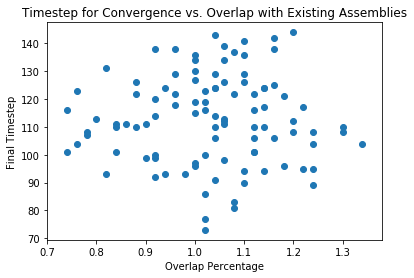

In [9]:
plt.scatter(xs, ys)
plt.title('Timestep for Convergence vs. Overlap with Existing Assemblies')
plt.xlabel('Overlap Percentage')
plt.ylabel('Final Timestep')
plt.savefig('convergence.jpg')

In [ ]:

def test_convergence(num_engrams):
    mem = Memory(k, n, p, b, T)
    concept, all_assemblies = mem.add_concept('Christos', num_engrams)
    t_mem = 200
    stimulus = Stimulus(k, n, p, attribute='Christos')
    fiber = Fiber(n, p, b) # concept <-> area
    _, (ogger_area, logger_concept) = \
        mem.stimulate_WM(stimulus, fiber, t_mem, return_log=True)
    return ogger_area, logger_concept

In [ ]:
logger_area, logger_concept = test_convergence(20)

In [ ]:
plt.plot(range(1,15), logger_area.num_new_winners[:14])
plt.title('Numer of New Winners in WM vs. Timestep')
plt.xlabel('timestep')
plt.ylabel('Number of New Winners in Winners')
plt.savefig('WM_convergence.jpg')

In [ ]:
plt.plot(range(1,200), logger_concept.num_new_winners)
plt.title('Numer of New Winners in Long-term Memory vs. Timestep')
plt.xlabel('timestep')
plt.ylabel('Number of New Winners in Winners')
plt.savefig('LT_convergence.jpg')